In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import bokeh.plotting.figure as bh_figure
from bokeh.io import curdoc, show
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import output_notebook
from bokeh.application import Application
from bokeh.application.handlers import FunctionHandler


output_notebook()

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

In [2]:
df = pd.read_csv("gapminder_clean.csv")

<Axes: xlabel='CO2 emissions (metric tons per capita)', ylabel='gdpPercap'>

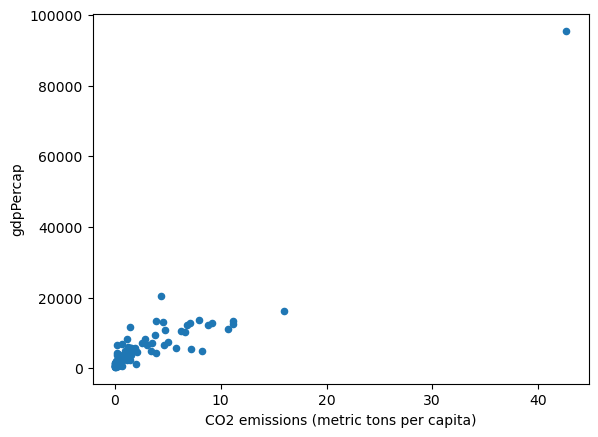

In [3]:
df[df.Year==1962].plot('CO2 emissions (metric tons per capita)','gdpPercap','scatter')

In [4]:
# correlation and associate p value of above metrics (1962)
df_1962 = df[df.Year==1962]
corr62 = df_1962['CO2 emissions (metric tons per capita)'].corr(df_1962['gdpPercap'],method='pearson',)
pval62 = df_1962['CO2 emissions (metric tons per capita)'].corr(df_1962['gdpPercap'],method=pearsonr_pval)

print(f'{corr62},{pval62}')

0.9260816725019451,1.1286792210037025e-46


In [5]:
corrAll = df['CO2 emissions (metric tons per capita)'].corr(df['gdpPercap'],method='pearson',)
pvalAll = df['CO2 emissions (metric tons per capita)'].corr(df['gdpPercap'],method=pearsonr_pval)

print(f'{corrAll},{pvalAll}')

0.8132918615315475,2.9309176165311536e-280


In [6]:
for annum in df['Year'].unique():
    df_annum = df[df.Year==annum]
    corr_annum = df_annum['CO2 emissions (metric tons per capita)'].corr(df_annum['gdpPercap'],method='pearson')
    pval_annum = df_annum['CO2 emissions (metric tons per capita)'].corr(df_annum['gdpPercap'],method=pearsonr_pval)
    print(f'{annum} \n {corr_annum} || {pval_annum}')
    

1962 
 0.9260816725019451 || 1.1286792210037025e-46
1967 
 0.9387918385063315 || 3.3971433566412762e-53
1972 
 0.8428985866268465 || 1.8242919425112502e-32
1977 
 0.7928335935904498 || 2.838891967092465e-26
1982 
 0.8166384024309292 || 5.565915798063993e-29
1987 
 0.8095530841191892 || 3.8996273624642746e-28
1992 
 0.8094316203754854 || 1.6106137786338822e-29
1997 
 0.80813963598667 || 7.976155566417991e-30
2002 
 0.8006420656289515 || 3.8635638626014606e-29
2007 
 0.720416883519592 || 9.232746580445126e-22


In [7]:
# ok so the highest correlation seems to be in 1967
df_1967 = df[df.Year==1967]


def modify_doc(doc):
    doc.add_root(row(layout, width=800))
    doc.title = "Sliders"
    text.on_change('value',update_title)

handler = FunctionHandler(modify_doc)
app = application(handler)
show(app)

# fig67 = go.Figure()

# fig67.add_trace(go.Scatter(
#     x = df_1967['CO2 emissions (metric tons per capita)'],
#     y = df_1967['gdpPercap'],
#     mode = 'markers'
# ))

# fig67.update_layout(
#     title='CO2 emissions (metric tons per capita) vs GDP per Capita in 1967',
#     xaxis_title='CO2 emissions (metric tons per capita)',
#     yaxis_title='GDP per Capita'
# )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'x': array([0.12378238, 1.3637463 , 0.63211843, ..., 0.52419669, 1.26362796,
                          1.12296052]),
              'y': array([ 836.1971382, 2760.196931 , 3246.991771 , ...,          nan,
                          1777.077318 ,  569.7950712])}],
    'layout': {'template': '...',
               'title': {'text': 'CO2 emissions (metric tons per capita) vs GDP per Capita in 1967'},
               'xaxis': {'title': {'text': 'CO2 emissions (metric tons per capita)'}},
               'yaxis': {'title': {'text': 'GDP per Capita'}}}
})